# 2. 강의의 MNIST 데이터셋을 이용해서 모델을 설계하고 학습하는 프로그램을 작성하고, 프로그램 소스와 실행 결과 화면을 캡처하여 제출하시오.

학습 데이터셋 이미지 수 : 60000 개
테스트 데이터셋 이미지 수 : 10000 개


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,466 (3.86 MB)

 Trainable params: 1,011,466 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8535 - loss: 0.4691 - val_accuracy: 0.9816 - val_loss: 0.0645
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9816 - loss: 0.0623 - val_accuracy: 0.9871 - val_loss: 0.0441
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9878 - loss: 0.0388 - val_accuracy: 0.9884 - val_loss: 0.0406
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9907 - val_loss: 0.0364
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9900 - val_loss: 0.0381
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9954 - loss: 0.0132 - val_accuracy: 0.9898 - val_loss: 0.0395
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9961 - loss: 0.0128 - val_accu

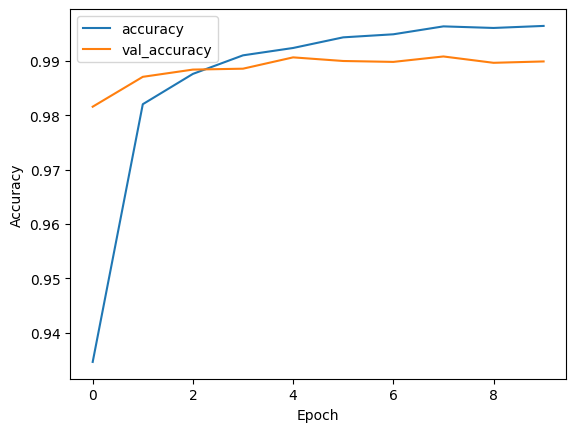

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow의 Keras API 함수 import
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# load_data() : MNIST 데이터셋을 로드하고 학습 데이터셋과 훈련 데이터셋으로 반환
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("학습 데이터셋 이미지 수 : {} 개".format(x_train.shape[0]))
print("테스트 데이터셋 이미지 수 : {} 개".format(x_test.shape[0]))

# reshape() : 리스트 형태 변경
# - 이미지를 학습하는 CNN 입력 : (총 데이터 수, 가로 픽셀 수, 세로 픽셀 수, 채널)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# astype() : 데이터 타입 변환
# - float64 : 실수형
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 0 ~ 255 → 0 ~ 1
x_train /= 255
x_test /= 255

# to_categorical() : 정수 형태의 클래스 레이블을 원-핫 인코딩된 벡터로 변환
# - 첫 번째 인자 : 클래스
# - 두 번째 인자 : 클래스 개수
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN 모델 정의
model = Sequential()

# Conv2D : 합성곱 층
# - 첫 번째 인자 : 적용할 커널 수
# - kernel_size : 커널의 크기(행, 열)
# - input_shape : 입력 데이터 형식(행, 열, 차원)
# - activation : 활성화 함수
#    - relu : ReLU 함수
convolutional_layer_1 = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))


# MaxPooling2D : 맥스 풀링 층
# - pool_size : 풀링 윈도우 크기
max_pooling_2d = MaxPooling2D(pool_size=(2, 2))

# Conv2D : 합성곱 층
# - 첫 번째 인자 : 적용할 커널 수
# - kernel_size : 커널의 크기(행, 열)
# - activation : 활성화 함수
#    - relu : ReLU 함수
convolutional_layer_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')

# Hidden Layer 생성
# - 첫 번째 인자 : 출력 차원
# - activation : 활성화 함수
#    - relu : ReLU 함수
hidden_layer = Dense(128, activation='relu')

# Output Layer 생성
# - 첫 번째 인자 : 출력 차원
# - activation : 활성화 함수
#    - softmax : 소프트맥스 함수
output_layer = Dense(10, activation='softmax')

# add() : 모델에 Layer 추가
model.add(convolutional_layer_1)
model.add(max_pooling_2d)
model.add(convolutional_layer_2)
model.add(Flatten())
model.add(hidden_layer)
model.add(Dropout(0.25))
model.add(output_layer)

# summary() : 모델의 구조 및 매개 변수(파라미터)에 대한 정보를 요약
model.summary()

# compile() : 모델 학습 과정 설정
# - optimizer : 손실 함수을 통해 얻은 오차를 줄여주기 위해 모델을 업데이트하는 방법
#   - adam : Adam
# - loss : 손실 함수(실제 값과 예측 값 사이의 오차에 대한 식)
#   - categorical_crossentropy : (다항 분류) 교차 엔트로피 오차 함수
# - metrics : 성능 지표
#   -  accuracy : 정확도
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit() : 모델 학습
# - 첫 번째 인자 : 입력 데이터
# - 두 번째 인자 : 결과 데이터
# - batch_size : 한 번에 학습할 때 사용하는 데이터 개수
# - epochs : 학습 데이터 반복 횟수
# - validation_split : 검증 데이터셋 비율
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# 학습 결과 출력
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


테스트 손실 : 0.03216366469860077
테스트 정확도 : 0.9908000230789185


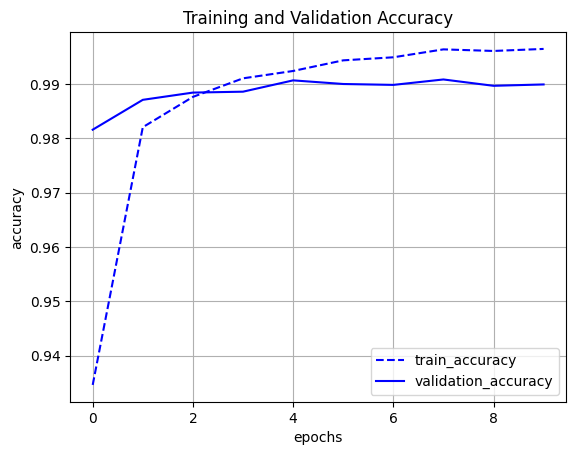

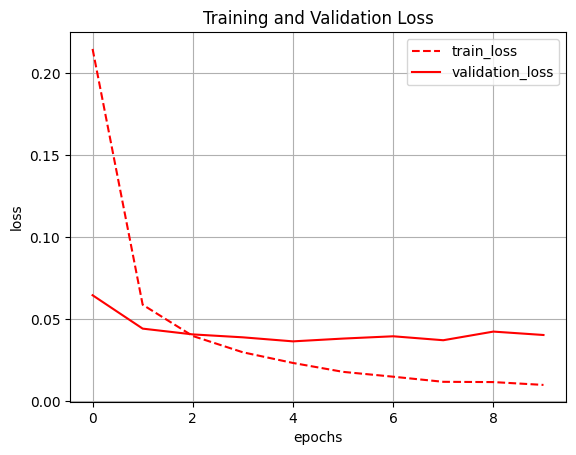

In [4]:
# evaluate() : 모델 평가 지표 반환
results = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실 :', results[0])
print('테스트 정확도 :', results[1])

# 학습 데이터셋과 검증 데이터셋의 정확도와 오차
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs 수를 맞추기 위해 history에서 가져온 길이를 사용
epochs = np.arange(len(accuracy))

# 정확도 그래프
plt.plot(epochs, accuracy, "b--", label='train_accuracy')               # 학습 정확도 표시
plt.plot(epochs, val_accuracy, "b", label='validation_accuracy')       # 검증 정확도 표시
plt.title('Training and Validation Accuracy')                           # 제목
plt.legend()                                                            # 범례
plt.grid()                                                              # 그리드(격자)
plt.xlabel('epochs')                                                    # x축 레이블
plt.ylabel('accuracy')                                                  # y축 레이블
plt.show()                                                              # 그래프 출력

# 오차 그래프
plt.plot(epochs, loss, "r--", label='train_loss')                       # 학습 오차 표시
plt.plot(epochs, val_loss, "r", label='validation_loss')                # 검증 오차 표시
plt.title('Training and Validation Loss')                               # 제목
plt.legend()                                                            # 범례
plt.grid()                                                              # 그리드(격자)
plt.xlabel('epochs')                                                    # x축 레이블
plt.ylabel('loss')                                                      # y축 레이블
plt.show()                                                              # 그래프 출력


# 3. 강의의 CIFAR-10 데이터셋을 이용해서 모델을 설계하고 학습하는 프로그램을 작성하고, 프로그램 소스와 실행 결과 화면을 캡처하여 제출하시오.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
학습 데이터셋 이미지 수 : 50000 개
테스트 데이터셋 이미지 수 : 10000 개


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3019 - loss: 1.8840 - val_accuracy: 0.4704 - val_loss: 1.5528
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5047 - loss: 1.3675 - val_accuracy: 0.5732 - val_loss: 1.3356
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5697 - loss: 1.2027 - val_accuracy: 0.6223 - val_loss: 1.1821
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6166 - loss: 1.0985 - val_accuracy: 0.6450 - val_loss: 1.0746
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6527 - loss: 0.9920 - val_accuracy: 0.6361 - val_loss: 1.0841
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6696 - loss: 0.9398 - val_accuracy: 0.6794 - val_loss: 1.0125
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6946 - loss: 0.8714 - val_accuracy: 0.6907 - val_loss: 0.9404
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7178 - loss: 0.8141 - val_acc

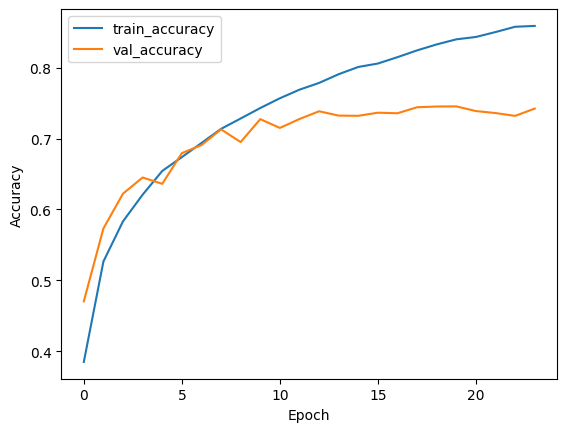

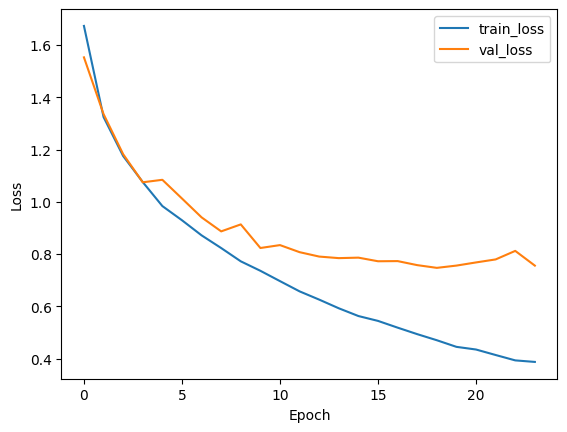

In [5]:
# 필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow의 Keras API 함수 import
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# load_data() : CIFAR-10 데이터셋을 로드하고 학습 데이터셋과 훈련 데이터셋으로 반환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("학습 데이터셋 이미지 수 : {} 개".format(x_train.shape[0]))
print("테스트 데이터셋 이미지 수 : {} 개".format(x_test.shape[0]))

# CIFAR-10 데이터셋의 결과 값 Class 리스트
class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

# reshape() : CNN 입력을 위한 형식으로 변환
# - 이미지를 학습하는 CNN 입력 : (총 데이터 수, 가로 픽셀 수, 세로 픽셀 수, 채널)
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

# astype() : 데이터 타입 변환
# - float64 : 실수형
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 0 ~ 255 → 0 ~ 1
x_train /= 255.0
x_test /= 255.0

# to_categorical() : 정수 형태의 클래스 레이블을 원-핫 인코딩된 벡터로 변환
# - 첫 번째 인자 : 클래스
# - 두 번째 인자 : 클래스 개수
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN 모델 정의
model = Sequential()

# Conv2D : 합성곱 층
# - 첫 번째 인자 : 적용할 커널 수
# - kernel_size : 커널의 크기(행, 열)
# - input_shape : 입력 데이터 형식(행, 열, 차원)
# - activation : 활성화 함수
#    - relu : ReLU 함수
convolutional_layer_1 = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))

# MaxPooling2D : 첫 번째 맥스 풀링 층
# - pool_size : 풀링 윈도우 크기
max_pooling_2d_1 = MaxPooling2D(pool_size=(2, 2))

# Conv2D : 두 번째 합성곱 층
# - 첫 번째 인자 : 적용할 커널 수
# - kernel_size : 커널의 크기(행, 열)
# - activation : 활성화 함수
#    - relu : ReLU 함수
convolutional_layer_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')

# MaxPooling2D : 두 번째 맥스 풀링 층
# - pool_size : 풀링 윈도우 크기
max_pooling_2d_2 = MaxPooling2D(pool_size=(2, 2))

# Conv2D : 세 번째 합성곱 층
# - 첫 번째 인자 : 적용할 커널 수
# - kernel_size : 커널의 크기(행, 열)
# - activation : 활성화 함수
#    - relu : ReLU 함수
convolutional_layer_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')

# Hidden Layer 생성
# - 첫 번째 인자 : 출력 차원
# - activation : 활성화 함수
#    - relu : ReLU 함수
hidden_layer = Dense(128, activation='relu')

# Output Layer 생성
# - 첫 번째 인자 : 출력 차원
# - activation : 활성화 함수
#    - softmax : 소프트맥스 함수
output_layer = Dense(10, activation='softmax')

# add() : 모델에 Layer 추가
model.add(convolutional_layer_1)
model.add(max_pooling_2d_1)
model.add(convolutional_layer_2)
model.add(Dropout(0.5))
model.add(max_pooling_2d_2)
model.add(convolutional_layer_3)
model.add(Flatten())
model.add(hidden_layer)
model.add(Dropout(0.25))
model.add(output_layer)

# summary() : 모델의 구조 및 매개 변수(파라미터)에 대한 정보를 요약
model.summary()

# compile() : 모델 학습 과정 설정
# - optimizer : 손실 함수을 통해 얻은 오차를 줄여주기 위해 모델을 업데이트하는 방법
#   - adam : Adam
# - loss : 손실 함수(실제 값과 예측 값 사이의 오차에 대한 식)
#   - categorical_crossentropy : (다항 분류) 교차 엔트로피 오차 함수
# - metrics : 성능 지표
#   -  accuracy : 정확도
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping : 학습 중인 모델을 조기 중단
# - monitor : 모니터링할 지표
# - patience : 지정된 지표가 개선되지 않는 에포크 수
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# fit() : 모델 학습
# - 첫 번째 인자 : 입력 데이터
# - 두 번째 인자 : 결과 데이터
# - batch_size : 한 번에 학습할 때 사용하는 데이터 개수
# - epochs : 학습 데이터 반복 횟수
# - validation_split : 검증 데이터셋 비율
# - callbacks : 학습 중에 사용할 콜백
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, callbacks=[early_stopping])

# 학습 결과 출력
plt.plot(history.history['accuracy'], label='train_accuracy')          # 학습 정확도 표시
plt.plot(history.history['val_accuracy'], label='val_accuracy')        # 검증 정확도 표시
plt.xlabel('Epoch')                                                    # x축 레이블
plt.ylabel('Accuracy')                                                 # y축 레이블
plt.legend()                                                           # 범례
plt.show()                                                             # 그래프 출력

plt.plot(history.history['loss'], label='train_loss')                  # 학습 오차 표시
plt.plot(history.history['val_loss'], label='val_loss')                # 검증 오차 표시
plt.xlabel('Epoch')                                                    # x축 레이블
plt.ylabel('Loss')                                                     # y축 레이블
plt.legend()                                                           # 범례
plt.show()                                                             # 그래프 출력


테스트 손실 : 0.7723515629768372
테스트 정확도 : 0.732699990272522


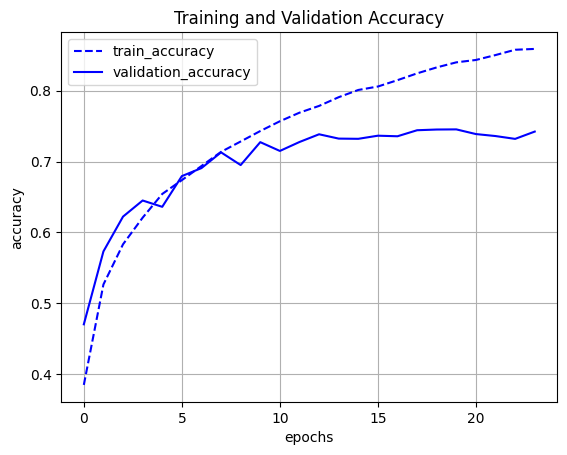

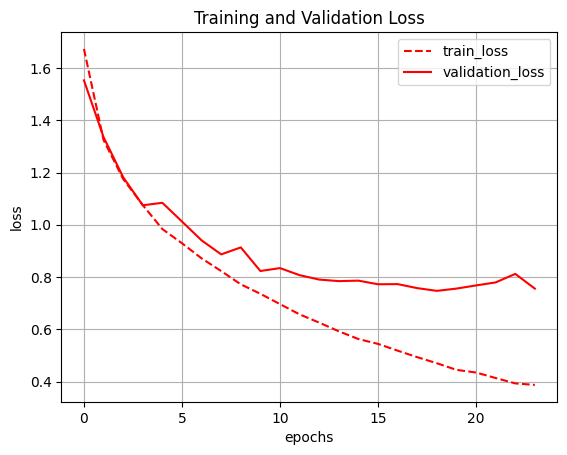

In [6]:
# evaluate() : 모델 평가 지표 반환
results = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실 :', results[0])
print('테스트 정확도 :', results[1])

# 학습 데이터셋과 검증 데이터셋의 정확도와 오차
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs 수를 맞추기 위해 history에서 가져온 길이를 사용
epochs = np.arange(len(accuracy))

# 정확도 그래프
plt.plot(epochs, accuracy, "b--", label='train_accuracy')               # 학습 정확도 표시
plt.plot(epochs, val_accuracy, "b", label='validation_accuracy')       # 검증 정확도 표시
plt.title('Training and Validation Accuracy')                           # 제목
plt.legend()                                                            # 범례
plt.grid()                                                              # 그리드(격자)
plt.xlabel('epochs')                                                    # x축 레이블
plt.ylabel('accuracy')                                                  # y축 레이블
plt.show()                                                              # 그래프 출력

# 오차 그래프
plt.plot(epochs, loss, "r--", label='train_loss')                       # 학습 오차 표시
plt.plot(epochs, val_loss, "r", label='validation_loss')                # 검증 오차 표시
plt.title('Training and Validation Loss')                               # 제목
plt.legend()                                                            # 범례
plt.grid()                                                              # 그리드(격자)
plt.xlabel('epochs')                                                    # x축 레이블
plt.ylabel('loss')                                                      # y축 레이블
plt.show()                                                              # 그래프 출력
